# Asset Analyis

## Time Series Analysis
Creation date is a proxy of asset introduction to marketplate. We'll use that to get a sense of how often sweetgreen is adding new options

In [1]:
import sweetgreen as sg
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
asset_json = ingredients = sg.utils.read_json("../data/cleaned/compiled_assets.json")
list(ingredients.values())[:2]

[{'id': 756,
  'created_at': '2015-12-19T18:54:14.161Z',
  'updated_at': '2015-12-19T18:54:14.384Z',
  'file_name': 'Shot_02_009_crop-1.jpg',
  'file_size': 48189,
  'content_type': 'image/jpeg',
  'type': 'Herd::Image',
  'asset_class': 'image',
  'width': 350,
  'height': 350,
  'url': '//cdn-7.sweetgreen.com/production/images/362/756/Shot_02_009_crop-1.jpg',
  'position': None,
  'metadata': '{"read_url": "https://gravy-herd.s3.amazonaws.com/production/images/362/756/Shot_02_009_crop-1.jpg", "make": "Canon", "model": "Canon EOS 5D Mark III", "height": 350, "width": 350}',
  'assetable_type': None,
  'assetable_id': None,
  'transform_name': 'admin-index',
  'parent_asset_id': 362,
  'transform_id': 21},
 {'id': 757,
  'created_at': '2015-12-19T18:54:14.430Z',
  'updated_at': '2015-12-19T18:54:14.623Z',
  'file_name': 'Shot_02_009_crop-1.jpg',
  'file_size': 96494,
  'content_type': 'image/jpeg',
  'type': 'Herd::Image',
  'asset_class': 'image',
  'width': 800,
  'height': 800,
  'u

## Print all asset metadata

In [3]:
cleaned_assets = []
for asset in asset_json.values():
    
    metadata = asset.pop("metadata", {})
    if metadata:
        metadata = json.loads(metadata)
        for key in ("width", "height", "content_url"):
            metadata.pop(key, None)
    
    asset = {**asset, **metadata}
    cleaned_assets.append(asset)
    
df = pd.DataFrame(cleaned_assets)
df["created_at"] = pd.to_datetime(df["created_at"]).dt.date
df["updated_at"] = pd.to_datetime(df["updated_at"]).dt.date

df.head()

,asset_class,assetable_id,assetable_type,content_type,created_at,file_name,file_size,height,id,make,model,parent_asset_id,position,read_url,transform_id,transform_name,type,updated_at,url,width
0,image,NaN,None,image/jpeg,2015-12-19,Shot_02_009_crop-1.jpg,48189,350,756,Canon,Canon EOS 5D Mark III,362.0,None,https://gravy-herd.s3.amazonaws.com/production...,21.0,admin-index,Herd::Image,2015-12-19,//cdn-7.sweetgreen.com/production/images/362/7...,350
1,image,NaN,None,image/jpeg,2015-12-19,Shot_02_009_crop-1.jpg,96494,800,757,Canon,Canon EOS 5D Mark III,362.0,None,https://gravy-herd.s3.amazonaws.com/production...,22.0,uploader.index,Herd::Image,2015-12-19,//cdn-8.sweetgreen.com/production/images/362/7...,800
2,image,NaN,None,image/jpeg,2015-12-19,Shot_02_009_crop-1.jpg,39877,250,758,Canon,Canon EOS 5D Mark III,362.0,None,https://gravy-herd.s3.amazonaws.com/production...,23.0,ingredient-toggle,Herd::Image,2015-12-19,//cdn-4.sweetgreen.com/production/images/362/7...,250
3,image,NaN,None,image/jpeg,2018-03-29,Shot_02_009_crop-1.jpg,96494,800,5194,NaN,NaN,362.0,None,https://gravy-herd.s3.amazonaws.com/production...,5.0,uploader.index,Herd::Image,2018-03-29,//cdn-4.sweetgreen.com/production/images/362/5...,800
4,image,8.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_02_009_crop-1.jpg,98786,800,362,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-1.sweetgreen.com/production/images/maste...,800


In [4]:
df.shape

(627, 20)

In [5]:
df[(df["created_at"] != df["updated_at"])]

,asset_class,assetable_id,assetable_type,content_type,created_at,file_name,file_size,height,id,make,model,parent_asset_id,position,read_url,transform_id,transform_name,type,updated_at,url,width
4,image,8.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_02_009_crop-1.jpg,98786,800,362,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-1.sweetgreen.com/production/images/maste...,800
8,image,53.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_07_007_crop-1.jpg,63575,800,287,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-3.sweetgreen.com/production/images/maste...,800
13,image,73.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_24_011_crop-1.jpg,51293,800,376,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-5.sweetgreen.com/production/images/maste...,800
18,image,13.0,Gravy::Ingredient,image/jpeg,2015-12-19,Caesar_01_crop-1.jpg,31954,800,281,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-3.sweetgreen.com/production/images/maste...,800
21,image,162.0,Gravy::Ingredient,image/jpeg,2016-08-18,ZA_ATAR_BREADCRUMBS_8646.jpg,2921099,3000,2102,Canon,Canon EOS 5DS R,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-2.sweetgreen.com/production/images/maste...,3000
29,image,3.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_01_011_crop-1.jpg,86793,800,286,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-1.sweetgreen.com/production/images/maste...,800
47,image,7.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_21_005_crop-1.jpg,113433,800,329,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-2.sweetgreen.com/production/images/maste...,800
51,image,49.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_06_007_crop-1.jpg,53088,800,276,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-7.sweetgreen.com/production/images/maste...,800
56,image,67.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_18_010_crop-1.jpg,97308,800,361,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-4.sweetgreen.com/production/images/maste...,800
61,image,72.0,Gravy::Ingredient,image/jpeg,2015-12-19,Shot_33_004_crop-1.jpg,42036,800,374,Canon,Canon EOS 5D Mark III,NaN,None,https://gravy-herd.s3.amazonaws.com/production...,NaN,None,Herd::Image,2016-09-06,//cdn-0.sweetgreen.com/production/images/maste...,800


In [6]:
pd.options.display.max_colwidth = 120
df[["id", "read_url", "created_at", "file_name"]]

,id,read_url,created_at,file_name
0,756,https://gravy-herd.s3.amazonaws.com/production/images/362/756/Shot_02_009_crop-1.jpg,2015-12-19,Shot_02_009_crop-1.jpg
1,757,https://gravy-herd.s3.amazonaws.com/production/images/362/757/Shot_02_009_crop-1.jpg,2015-12-19,Shot_02_009_crop-1.jpg
2,758,https://gravy-herd.s3.amazonaws.com/production/images/362/758/Shot_02_009_crop-1.jpg,2015-12-19,Shot_02_009_crop-1.jpg
3,5194,https://gravy-herd.s3.amazonaws.com/production/images/362/5194/Shot_02_009_crop-1.jpg,2018-03-29,Shot_02_009_crop-1.jpg
4,362,https://gravy-herd.s3.amazonaws.com/production/images/master/Shot_02_009_crop-1.jpg,2015-12-19,Shot_02_009_crop-1.jpg
5,529,https://gravy-herd.s3.amazonaws.com/production/images/287/529/Shot_07_007_crop-1.jpg,2015-12-19,Shot_07_007_crop-1.jpg
6,530,https://gravy-herd.s3.amazonaws.com/production/images/287/530/Shot_07_007_crop-1.jpg,2015-12-19,Shot_07_007_crop-1.jpg
7,528,https://gravy-herd.s3.amazonaws.com/production/images/287/528/Shot_07_007_crop-1.jpg,2015-12-19,Shot_07_007_crop-1.jpg
8,287,https://gravy-herd.s3.amazonaws.com/production/images/master/Shot_07_007_crop-1.jpg,2015-12-19,Shot_07_007_crop-1.jpg
9,798,https://gravy-herd.s3.amazonaws.com/production/images/376/798/Shot_24_011_crop-1.jpg,2015-12-19,Shot_24_011_crop-1.jpg


In [7]:
# There are a lot of duplicate products that need to be cleared out
df_dedup = df[["id", "read_url", "created_at", "file_name"]].groupby("file_name").first()
df_dedup["created_at"] = pd.to_datetime(df_dedup["created_at"])
df_dedup

,id,read_url,created_at
file_name,,,
1 (4).jpg,5384,https://gravy-herd.s3.amazonaws.com/production/images/5381/5384/1%20%284%29.jpg,2018-05-23
2 (1).jpg,5456,https://gravy-herd.s3.amazonaws.com/production/images/5404/5456/2%20%281%29.jpg,2018-05-31
20180407-SWEETGREEN28448.jpg,5418,https://gravy-herd.s3.amazonaws.com/production/images/5415/5418/20180407-SWEETGREEN28448.jpg,2018-05-23
4 (1).jpg,5420,https://gravy-herd.s3.amazonaws.com/production/images/5419/5420/4%20%281%29.jpg,2018-05-23
BLUE_CHEESE_18175 1-1.jpg,3180,https://gravy-herd.s3.amazonaws.com/production/images/3179/3180/BLUE_CHEESE_18175%201-1.jpg,2016-12-13
BalsamicVinagrette_01_crop-1.jpg,468,https://gravy-herd.s3.amazonaws.com/production/images/274/468/BalsamicVinagrette_01_crop-1.jpg,2015-12-19
Blackened Chicken Thighs.jpg,5776,https://gravy-herd.s3.amazonaws.com/production/images/5775/5776/Blackened%20Chicken%20Thighs.jpg,2018-08-08
CURRY_DRESSING_18208.jpg,3128,https://gravy-herd.s3.amazonaws.com/production/images/3127/3128/CURRY_DRESSING_18208.jpg,2016-12-13
Caesar_01_crop-1.jpg,4349,https://gravy-herd.s3.amazonaws.com/production/images/281/4349/Caesar_01_crop-1.jpg,2017-10-04


In [8]:
df_dedup.set_index("created_at").groupby(lambda x: (x.month, x.year)).count()

,id,read_url
"(1, 2018)",1,1
"(1, 2019)",47,47
"(2, 2018)",2,2
"(3, 2016)",1,1
"(3, 2018)",6,6
"(5, 2016)",1,1
"(5, 2018)",9,9
"(7, 2016)",3,3
"(7, 2018)",10,10
"(8, 2016)",3,3


In [9]:
upload_counts = df_dedup.assign(month=lambda x: x["created_at"].dt.month, year=lambda x: x["created_at"].dt.year) \
.groupby(["year", "month"])["id"].count()
upload_counts

year  month
2015  12       50
2016  3         1
      5         1
      7         3
      8         3
      9         3
      12        4
2017  8         2
      10        1
2018  1         1
      2         2
      3         6
      5         9
      7        10
      8         5
      9         2
      10        2
      11        2
      12        5
2019  1        47
Name: id, dtype: int64

Text(0.5, 0.98, 'Plot of Asset Uploads by Date')

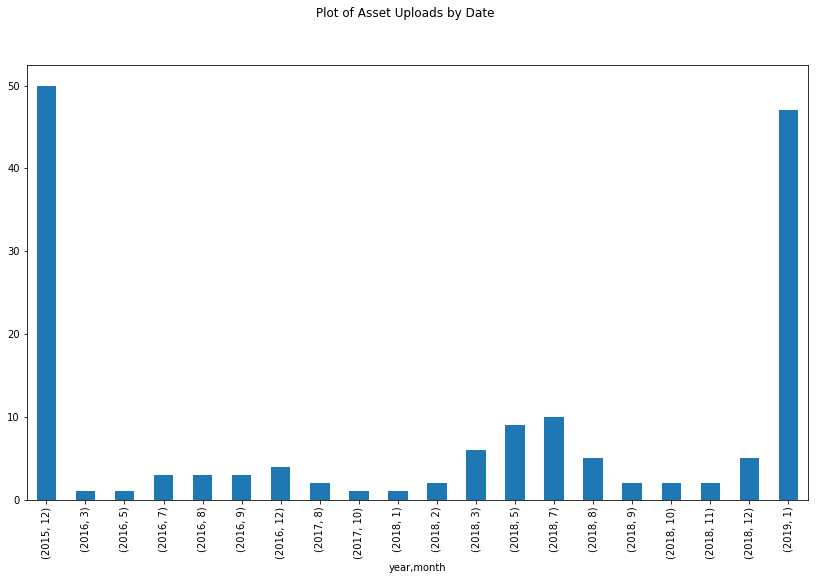

In [10]:
fig, ax = plt.subplots()
upload_counts.plot(kind="bar", figsize = (14,8), ax=ax)
fig.suptitle("Plot of Asset Uploads by Date")

In [30]:
html_template = """
<html> \n
<body>\n 
<h1> Asset Uploads by Date</h1>
"""
html_output = open("sg_product_assets.html", "w")

grouped = df_dedup.reset_index().sort_values(by="created_at").set_index("created_at").groupby(lambda x: (x.year, x.month))

for name, group in grouped:
    html_output.write("<h2> Date: {}/{} </h2> \n".format(name[1], name[0]))
    html_output.write("<hr>\n".format(name[1], name[0]))

    
    for index, image in group.iterrows():
        html_output.write("<h4> {} </h4>".format(image["file_name"]))
        html_output.write('<div> <img src="{}" style="width:400px;height:400px;" > </div> \n'.format(image["read_url"]))

html_output.write(("</body> \n"
                   "</html> \n "))
html_output.close()

In [22]:
df_dedup[df_dedup["created_at"].dt.year >2018]

,id,read_url,created_at
file_name,,,
S119_Menu Hero Image.jpg,6640,https://gravy-herd.s3.amazonaws.com/production/images/master/S119_Menu%20Hero%20Image.jpg,2019-01-03
bev_bev_harneygreen@3x.jpg,6447,https://gravy-herd.s3.amazonaws.com/production/images/6446/6447/bev_bev_harneygreen%403x.jpg,2019-01-03
bev_chamomilemint@3x (1).jpg,6461,https://gravy-herd.s3.amazonaws.com/production/images/6458/6461/bev_chamomilemint%403x%20%281%29.jpg,2019-01-03
bev_cucumberginger@3x (1).jpg,6466,https://gravy-herd.s3.amazonaws.com/production/images/6462/6466/bev_cucumberginger%403x%20%281%29.jpg,2019-01-03
bev_harneyunsweet@3x.jpg,6646,https://gravy-herd.s3.amazonaws.com/production/images/6467/6646/bev_harneyunsweet%403x.jpg,2019-01-03
bev_icedchai@3x (1).jpg,6479,https://gravy-herd.s3.amazonaws.com/production/images/6470/6479/bev_icedchai%403x%20%281%29.jpg,2019-01-03
bev_jasminegreentea@3x (1).jpg,6478,https://gravy-herd.s3.amazonaws.com/production/images/6474/6478/bev_jasminegreentea%403x%20%281%29.jpg,2019-01-03
bev_kaleginger@3x (1).jpg,6486,https://gravy-herd.s3.amazonaws.com/production/images/6480/6486/bev_kaleginger%403x%20%281%29.jpg,2019-01-03
bev_lemonfresca@3x (1).jpg,6487,https://gravy-herd.s3.amazonaws.com/production/images/6483/6487/bev_lemonfresca%403x%20%281%29.jpg,2019-01-03
